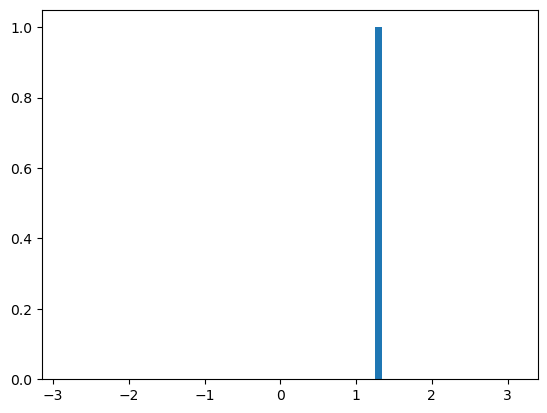

Locations: [-2.800001382827759, -2.2148265838623047, -1.6296515464782715, -1.0444766283035278, -0.4593017101287842, 0.12587285041809082, 0.711047887802124, 1.2962228059768677, 1.8813977241516113, 2.4665727615356445, 3.0517475605010986]
Weights: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9999991655349731, 0.0, 0.0, 0.0]


In [17]:
import torch
import pytorch_measure as pm

data = torch.randn(1000)
l = [min(data).item(), max(data).item()]
N = 11
def loss_fn(w):
    # Funkar inte riktigt
    i = []
    m = torch.distributions.Categorical(w)
    for y in data:
        # Remap y from l to range(len(w))
        i.append(round((y.item() - l[0]) * (len(w) - 1) / (l[1] - l[0])))
        m.sample_n(i)
    return loss(w[i], torch.tensor(i))

def test_step():
    w = torch.softmax(torch.rand(N), dim=0)
    l = torch.linspace(min(data).item(), max(data).item(), N)
    measure = pm.PytorchMeasure(l, w)
    for epoch in range(1000):
        measure.step(loss_fn, 0.01)
    measure.visualize()
    print(measure)

test_step()



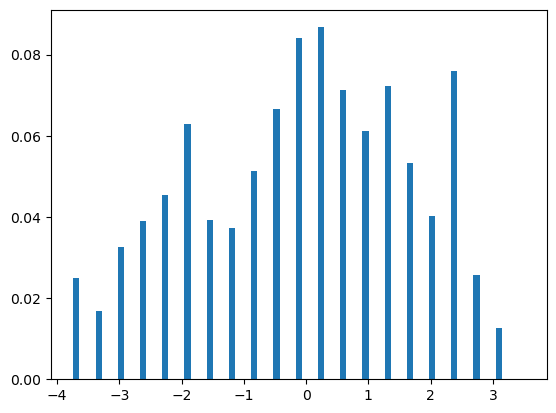

Locations: [-3.6891868114471436, -3.332104444503784, -2.9750218391418457, -2.6179394721984863, -2.260857105255127, -1.9037747383117676, -1.546692132949829, -1.1896097660064697, -0.8325273990631104, -0.4754449725151062, -0.11836254596710205, 0.23871994018554688, 0.5958023071289062, 0.9528846740722656, 1.309967279434204, 1.6670496463775635, 2.024132251739502, 2.3812146186828613, 2.7382969856262207, 3.095379590988159, 3.4524619579315186]
Weights: [0.02500000037252903, 0.01673099584877491, 0.03248032554984093, 0.038970913738012314, 0.045481517910957336, 0.06297279894351959, 0.039325036108493805, 0.03738083317875862, 0.051232632249593735, 0.06665187329053879, 0.08416907489299774, 0.08673401176929474, 0.0712851732969284, 0.061186932027339935, 0.07238271087408066, 0.05340798571705818, 0.040251724421978, 0.07595724612474442, 0.025667790323495865, 0.012730417773127556, 0.0]


In [10]:
data = torch.randn(2000)
l = [min(data).item(), max(data).item()]
N = 21
def loss_fn(w):
    # Funkar inte riktigt
    log_prob = 0
    for y in data:
        # Remap y from l to range(len(w))
        i = round((y.item() - l[0]) * (len(w) - 1) / (l[1] - l[0]))
        log_prob += torch.log(w[i])
    return -log_prob

def test_step():
    w = torch.softmax(torch.rand(N), dim=0)
    loc = torch.linspace(min(data).item(), max(data).item(), N)
    measure = pm.PytorchMeasure(loc, w)
    for epoch in range(500):
        measure.step(loss_fn, 0.05)
    measure.visualize()
    print(measure)

test_step()



In [65]:
torch.manual_seed(12)
m = torch.nn.Softmax(dim=1)
loss = torch.nn.NLLLoss()
# input is of size N x C = 3 x 5
input = torch.rand(3,5,requires_grad=True)
# each element in target has to have 0 <= value < C
target = torch.tensor([1, 0, 3])
output = loss(input, target)
output.backward()
print(input.grad)
print(input)

tensor([[ 0.0000, -0.3333,  0.0000,  0.0000,  0.0000],
        [-0.3333,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000, -0.3333,  0.0000]])
tensor([[0.4657, 0.2328, 0.4527, 0.5871, 0.4086],
        [0.1272, 0.6373, 0.2421, 0.7312, 0.7224],
        [0.1992, 0.6948, 0.5830, 0.6318, 0.5559]], requires_grad=True)
